# Pymaceuticals Inc.
---

### Analysis

We can colcude that both Ramicane and Capomulin are the most effective drugs to treat the tumors since both had the lowest stat figures across the board and it works for both male and female without much issue given that the current test on gender is pretty balance. Even though the number of treatment tests are not similar as both Raminace and Capomulin had the highest number of measurement taken compare to others but if we were to look at the rumor growth by treatment, they are one the lowest among other drugs. By taking each mouse's sample for Capomulin treatment, we can futher support our claim that the tumor started to decrease significantly over time which shows the effectiveness of the drug.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
animal_study = pd.merge(study_results,mouse_metadata,how="left", on="Mouse ID")

# Display the data table for preview
animal_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
len(animal_study["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
miceID = animal_study.loc[animal_study.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
miceID

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
animal_study.loc[animal_study['Mouse ID'].isin(miceID), :]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
animal_study_complete = animal_study[animal_study['Mouse ID'].isin(miceID) == False]
animal_study_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
len(animal_study_complete["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumorMean = animal_study_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
tumorMedian = animal_study_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumorVar = animal_study_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tumorStd = animal_study_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tumorSem = animal_study_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

summaryStat = pd.DataFrame({"Mean Tumor Volume":tumorMean,
                            "Median Tumor Volume":tumorMedian,
                            "Tumor Volume Variance":tumorVar,
                            "Tumor Volume Std. Dev.":tumorStd,
                            "Tumor Volume Std. Err.":tumorSem})

summaryStat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
aggSummaryStat = animal_study_complete.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
aggSummaryStat

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

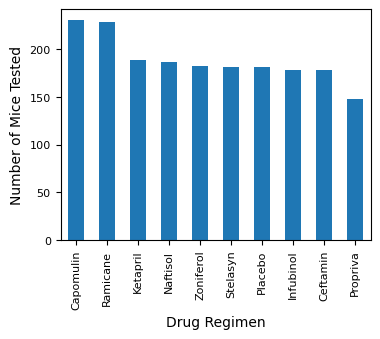

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
miceTestedPerDrug = animal_study_complete['Drug Regimen'].value_counts()

pdBarChart = miceTestedPerDrug.plot.bar(figsize=(4,3), xlabel = 'Drug Regimen', ylabel = 'Number of Mice Tested', fontsize = 8)

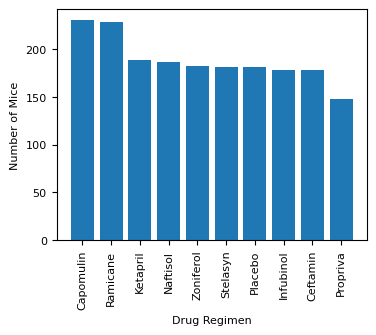

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugName = miceTestedPerDrug.index.values
totalMicePerDrug = miceTestedPerDrug.values

plt.rcParams['font.size'] = '8'
plt.figure(figsize=(4,3))
plt.bar(drugName, totalMicePerDrug, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")
plt.show()

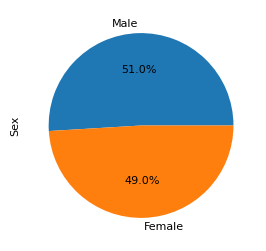

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
totalMicePerGender = animal_study_complete['Sex'].value_counts()
pdPieChart = totalMicePerGender.plot.pie(figsize=(4,3), fontsize = 8, autopct= "%1.1f%%")

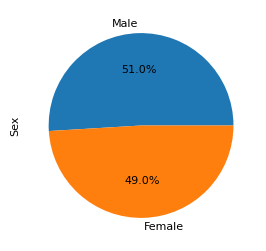

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
miceGender = totalMicePerGender.index.values
totalPerGender = totalMicePerGender.values

plt.rcParams['font.size'] = '8'
plt.figure(figsize=(4,3))
plt.pie(totalMicePerGender, labels=miceGender, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatestTimepoint = animal_study_complete.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
animal_study_merged = pd.merge(greatestTimepoint,animal_study_complete,how="left", on=("Mouse ID","Timepoint"))

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumVolPlot = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for treatmentname in treatments:
    tumVol = []
    tumorVol = animal_study_merged[animal_study_merged['Drug Regimen'] == treatmentname]['Tumor Volume (mm3)'].values
    tumVol.append(tumorVol)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # quartile = np.quantile(tumVol,[.25,.5,.75])

    lowerq = np.quantile(tumVol,[.25])
    upperq = np.quantile(tumVol,[.75])
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lowerBound = lowerq - (1.5*iqr)
    upperBound = upperq + (1.5*iqr)

    print(f"{treatmentname}'s potential outliers: lower bound {lowerBound} upper bound {upperBound}")
    tumVolPlot.append(tumorVol)

Capomulin's potential outliers: lower bound [20.70456165] upper bound [51.83201549]
Ramicane's potential outliers: lower bound [17.91266447] upper bound [54.30681135]
Infubinol's potential outliers: lower bound [36.83290495] upper bound [82.74144559]
Ceftamin's potential outliers: lower bound [25.35544958] upper bound [87.6664583]


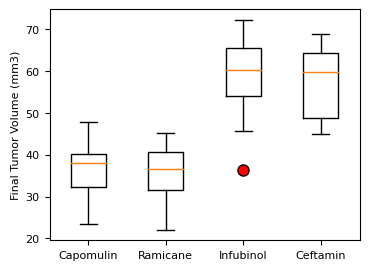

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(markerfacecolor='r', markersize=8, linestyle='none')
plt.rcParams['font.size'] = '8'
plt.figure(figsize=(4,3))
plt.boxplot(tumVolPlot, labels = treatments, flierprops = flierprops)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

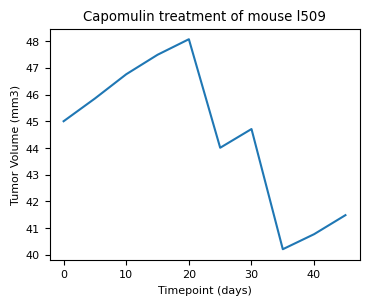

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
indivtumorVol = animal_study_complete[(animal_study_complete['Drug Regimen'] == 'Capomulin') & (animal_study_complete['Mouse ID'] == 'l509')]['Tumor Volume (mm3)'].values
indivTimePt = animal_study_complete[(animal_study_complete['Drug Regimen'] == 'Capomulin') & (animal_study_complete['Mouse ID'] == 'l509')]['Timepoint'].values

plt.rcParams['font.size'] = '8'
plt.figure(figsize=(4,3))
plt.plot(indivTimePt,indivtumorVol)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

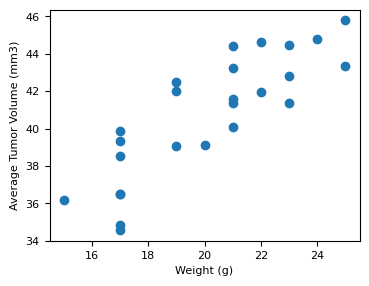

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avgTumorVol = animal_study_complete[(animal_study_complete['Drug Regimen'] == 'Capomulin')].groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
weight = animal_study_complete[(animal_study_complete['Drug Regimen'] == 'Capomulin')].groupby('Mouse ID')['Weight (g)'].mean()

plt.figure(figsize=(4,3))
plt.scatter(weight,avgTumorVol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


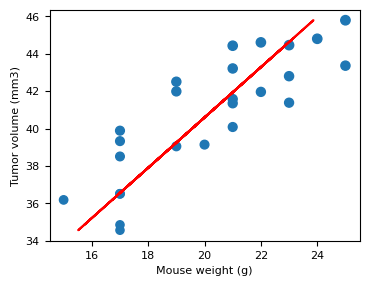

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr = st.pearsonr(avgTumorVol,weight)
(slope, intercept, rvalue, pvalue, stderr) = linregress(avgTumorVol,weight)
regress = avgTumorVol * slope + intercept

plt.figure(figsize=(4,3))
plt.scatter(weight,avgTumorVol, s=avgTumorVol)
plt.plot(regress,avgTumorVol,"r-")

plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(corr[0],2)}")
plt.show()